In [13]:
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(plyr)
library(purrr)
library(vegan)
#library(arrow)
library(rstatix)
library(parallel)
library(ggpubr)
library(ComplexHeatmap)
library(compositions)
library(ggsci)
library(math)
library(NatParksPalettes)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



Attaching package: ‘purrr’


The following object is masked from ‘package:plyr’:

    compact


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4


Attaching package: ‘rstatix’


The following objects are masked from ‘package:plyr’:

    desc, mutate


The following object is masked from ‘package:stats’:

    filter


Loading required package: ggplot2


Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    muta

ERROR: Error in library(compositions): there is no package called ‘compositions’


# Read data

In [14]:
# Read the CSV file into a data frame
read_df <- read.csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Frequency_Plot/Il1B_Cd14_mono_obsdata_v2.csv')


In [15]:
getwd()

[1] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis"

In [16]:
read_df$facet <- paste(read_df$subject.biologicalSex, read_df$cohort.cohortGuid, sep = "_")

In [17]:
head(read_df)
colnames(read_df)
length(unique(read_df$subject.subjectGuid))
length(unique(read_df$pbmc_sample_id))
dim(read_df)

,barcodes,batch_id,cell_name,cell_uuid,chip_id,hto_barcode,hto_category,n_genes,n_mito_umis,n_reads,⋯,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mito,log1p_total_counts_mito,pct_counts_mito,leiden_resolution_0.5,leiden_resolution_1,leiden_resolution_1.5,leiden_resolution_2,facet
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>
1,cfb4162a48b611ea8957bafe6d70929e,B001,anaemic_human_emu,cfb4162a48b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,2867,546,32119,⋯,55.89099,68.44291,546,6.304449,5.531354,0,3,4,18,Female_BR1
2,70ab258848b611eaa65d9e7d578d66f2,B001,pine_enervated_caracal,70ab258848b611eaa65d9e7d578d66f2,B001-P1C1,TGATGGCCTATTGGG,singlet,2354,220,27740,⋯,57.66811,71.84454,220,5.398163,2.714374,2,2,1,6,Female_BR1
3,70acf29648b611eaa65d9e7d578d66f2,B001,bland_sandy_owl,70acf29648b611eaa65d9e7d578d66f2,B001-P1C1,TGATGGCCTATTGGG,singlet,4302,776,73872,⋯,56.86120,68.77470,776,6.655440,3.608463,2,1,0,10,Female_BR1
4,70d2b34648b611eaa65d9e7d578d66f2,B001,mellow_intact_gecko,70d2b34648b611eaa65d9e7d578d66f2,B001-P1C1,TGATGGCCTATTGGG,singlet,2176,167,20037,⋯,52.73269,67.80391,167,5.123964,2.765817,0,7,9,9,Female_BR1
5,70d844f048b611eaa65d9e7d578d66f2,B001,commonable_jadeite_wrenchbird,70d844f048b611eaa65d9e7d578d66f2,B001-P1C1,TGATGGCCTATTGGG,singlet,1977,124,20342,⋯,57.78995,72.12544,124,4.828314,2.057408,2,2,1,6,Female_BR1
6,a711a6d8489811ea92388a6a0c683ffb,B001,villainous_preoceanic_jackal,a711a6d8489811ea92388a6a0c683ffb,B001-P1C1,TGATGGCCTATTGGG,singlet,1287,237,9010,⋯,56.26290,72.91810,237,5.472270,8.155540,2,2,13,19,Female_BR1


[1] "barcodes"                              
 [2] "batch_id"                              
 [3] "cell_name"                             
 [4] "cell_uuid"                             
 [5] "chip_id"                               
 [6] "hto_barcode"                           
 [7] "hto_category"                          
 [8] "n_genes"                               
 [9] "n_mito_umis"                           
[10] "n_reads"                               
[11] "n_umis"                                
[12] "original_barcodes"                     
[13] "pbmc_sample_id"                        
[14] "pool_id"                               
[15] "seurat_pbmc_type"                      
[16] "seurat_pbmc_type_score"                
[17] "umap_1"                                
[18] "umap_2"                                
[19] "well_id"                               
[20] "subject.biologicalSex"                 
[21] "subject.ethnicity"                     
[22] "subject.partnerCode"                   
[23] "subject.race"                          
[24] "subject.subjectGuid"                   
[25] "cohort.cohortGuid"                     
[26] "sample.visitName"                      
[27] "sample.visitDetails"                   
[28] "subject.birthYear"                     
[29] "CMV.IgG.Serology.Result.Interpretation"
[30] "BMI"                                   
[31] "predicted_doublet"                     
[32] "doublet_score"                         
[33] "AIFI_L1"                               
[34] "AIFI_L2"                               
[35] "AIFI_L3"                               
[36] "AIFI_L3.5"                             
[37] "n_genes_by_counts"                     
[38] "log1p_n_genes_by_counts"               
[39] "total_counts"                          
[40] "log1p_total_counts"                    
[41] "pct_counts_in_top_50_genes"            
[42] "pct_counts_in_top_100_genes"           
[43] "pct_counts_in_top_200_genes"           
[44] "pct_counts_in_top_500_genes"           
[45] "total_counts_mito"                     
[46] "log1p_total_counts_mito"               
[47] "pct_counts_mito"                       
[48] "leiden_resolution_0.5"                 
[49] "leiden_resolution_1"                   
[50] "leiden_resolution_1.5"                 
[51] "leiden_resolution_2"                   
[52] "facet"

[1] 92

[1] 92

[1] 2679   52

# CLR Transform


In [18]:
clr_transform <- function(x) {
  if (length(x) == 0) {
    return(NA)  # return NA for empty vectors
  }
  geom_mean <- exp(mean(log(x)))
  return(log(x / geom_mean))
}

# Comparsion within total PBMCs (Percentage and Percentage CLR)

In [19]:
#filter data for specific cluster

In [20]:
result <- read_df %>%
  dplyr::group_by(leiden_resolution_0.5, facet, subject.subjectGuid) %>%               
  dplyr::summarise(count = n()) %>% 
  dplyr::group_by(subject.subjectGuid) %>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>%
  dplyr::group_by(subject.subjectGuid) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% # Group again by subjectGuid for CLR# Calculate percentage
  dplyr::ungroup()

result

`summarise()` has grouped output by 'leiden_resolution_0.5', 'facet'. You can
override using the `.groups` argument.


leiden_resolution_0.5,facet,subject.subjectGuid,count,percentage,percentage_clr
<int>,<chr>,<chr>,<int>,<dbl>,<dbl>
0,Female_BR1,BR1001,9,27.272727,-1.823978e-01
0,Female_BR1,BR1003,1,16.666667,-4.620981e-01
0,Female_BR1,BR1005,4,28.571429,2.907877e-01
0,Female_BR1,BR1008,1,16.666667,-5.972532e-01
0,Female_BR1,BR1014,3,33.333333,6.016310e-01
0,Female_BR1,BR1017,3,25.000000,4.183728e-01
0,Female_BR1,BR1019,7,43.750000,6.354734e-01
0,Female_BR1,BR1021,26,61.904762,1.230565e+00
0,Female_BR1,BR1024,3,25.000000,1.469467e-01


# Plotting boxplots per cluster

In [44]:
#subset dataframe by cluster
subset_df <- read_df %>% filter(read_df$leiden_resolution_0.5 == 4)
dim(subset_df)

[1] 99 52

In [45]:
facet_count <- subset_df %>%
  dplyr::group_by(facet) %>%               
  dplyr::summarise(count = n()) %>%
  dplyr::mutate(percentage = (count / 2679) * 100) %>%   #<- change total cellcount
  dplyr::mutate(percentage_clr = clr_transform((percentage)))
  

facet_count

facet,count,percentage,percentage_clr
<chr>,<int>,<dbl>,<dbl>
Female_BR1,14,0.5225831,-0.39062707
Female_BR2,53,1.9783501,0.94060752
Male_BR1,19,0.7092199,-0.08524542
Male_BR2,13,0.4852557,-0.46473504


In [46]:
# install.packages("NatParksPalettes")
# library(NatParksPalettes)

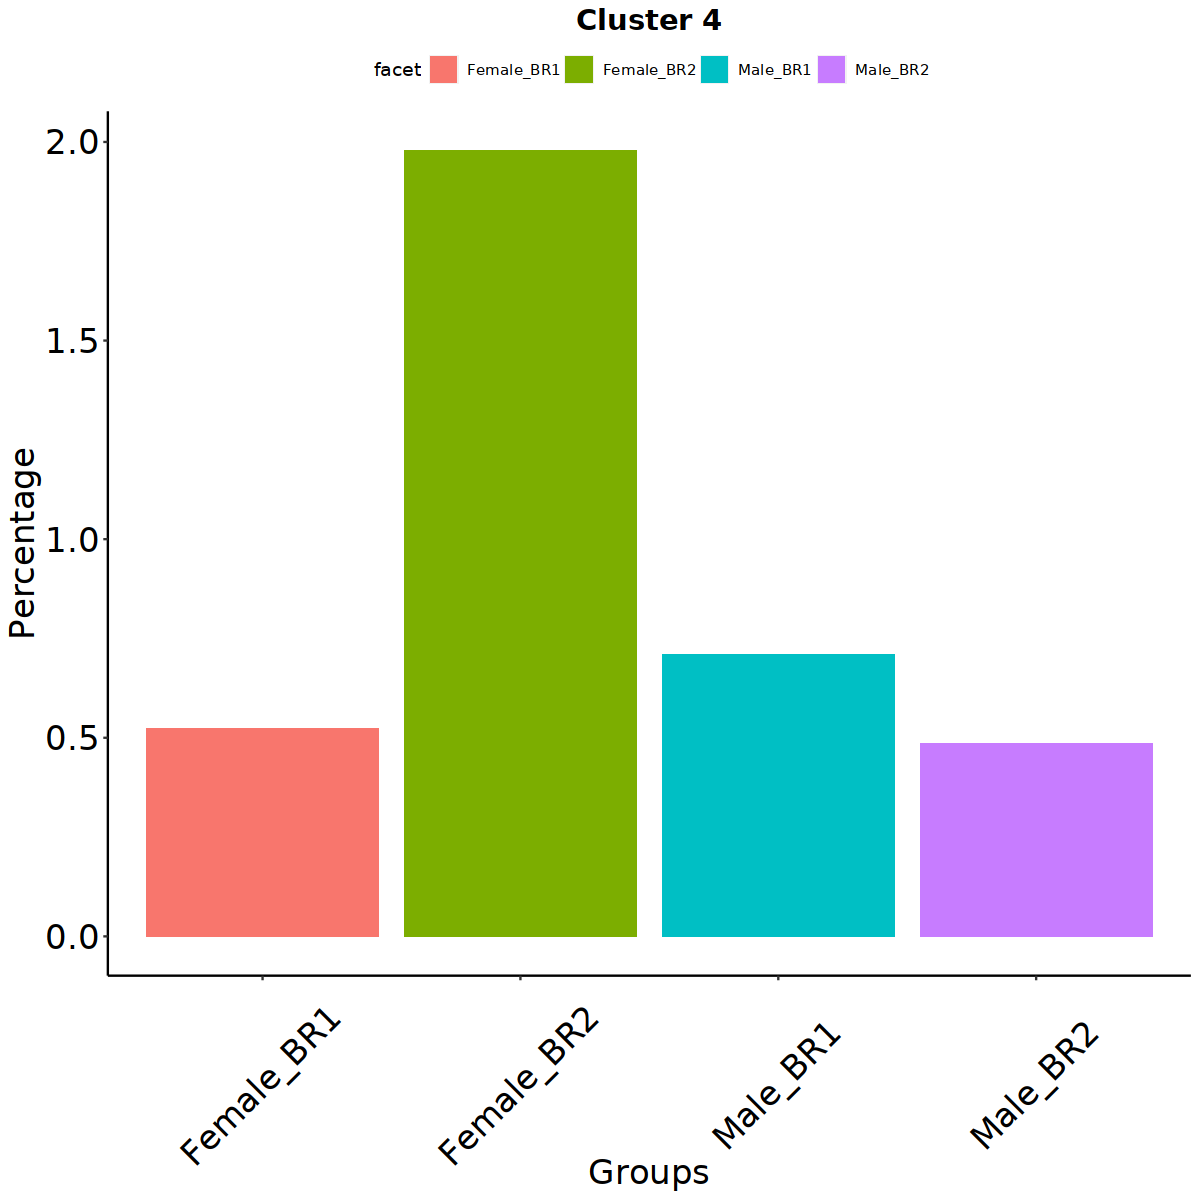

In [47]:

options(repr.plot.width = 10, repr.plot.height =10)
ggplot(facet_count, aes(x = facet , y = percentage, fill= facet)) +
  geom_col() +
  #scale_fill_manual(values=natparks.pals("SouthDowns", 4))+
  labs(#title = "Cluster 2",
       x = "Groups",
       y = "Percentage") +
  theme(axis.text.x = element_text(size = 20, angle = 45, vjust = 0.4, color= "black" ),     # Adjust font size of x-axis text
        axis.text.y = element_text(size = 20, color= "black"),     # Adjust font size of y-axis text
        axis.title = element_text(size = 20),
        panel.background = element_rect(fill = "white"),
        axis.line = element_line(color = "black"),  # Set axis line color to black,  # Set major grid line color to black
        panel.grid.minor = element_blank(),
        legend.position = "top",  # Set legend position to top
        #legend.title = element_blank()
       ) +
       ggtitle("Cluster 4") +
  theme(plot.title = element_text(hjust = 0.5, size = 17, face = "bold"))
   

In [25]:

# options(repr.plot.width = 10, repr.plot.height = 15)
# p3 <- ggplot(subset_df, aes(x = facet, y = percentage, color = facet)) +
#   geom_violin(width = 0.7) +  # Adjust width as needed
#   geom_boxplot(width = 0.5, outlier.shape = NA) +  # Nudge boxplots slightly for better visualization
#   geom_jitter(width = 0.1) +
#   ylab('Percentage') + 
#   xlab('Groups') +
#   scale_color_manual(values = c( "red","blue", "orange", "purple")) +
#   theme(axis.text.x = element_text(size = 14, angle = 90 ),     # Adjust font size of x-axis text
#         axis.text.y = element_text(size = 14),     # Adjust font size of y-axis text
#         axis.title = element_text(size = 14),
#         panel.background = element_rect(fill = "white"),
#         axis.line = element_line(color = "black"),  # Set axis line color to black,  # Set major grid line color to black
#         panel.grid.minor = element_blank(),
#         legend.position = "top",  # Set legend position to top
#         #legend.title = element_blank()
#        ) +
#   #stat_pvalue_manual(stat_test, label = "p", tip.length = 0) +
#   #scale_y_continuous(expand = expansion(mult = c(0, 0.1))) + 
#   ggtitle("Cluster 2") +
#   theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))

# p3